Wyświetlenie zawartości pliku CSV

In [250]:
import pandas as pd

df = pd.read_csv('bots_vs_users.csv')
df.head()

has_domain has_birth_date has_photo can_post_on_wall can_send_message  \
0        1.0            1.0       0.0              0.0              0.0   
1        1.0            1.0       0.0              0.0              0.0   
2        1.0            1.0       0.0              0.0              0.0   
3        1.0            1.0       0.0              0.0              0.0   
4        1.0            1.0       0.0              0.0              0.0   

  has_website gender has_short_name has_first_name has_last_name  ...  \
0         0.0    1.0            1.0            1.0           1.0  ...   
1         0.0    1.0            1.0            1.0           1.0  ...   
2         0.0    1.0            1.0            1.0           1.0  ...   
3         0.0    1.0            1.0            1.0           1.0  ...   
4         0.0    1.0            1.0            1.0           1.0  ...   

  ads_ratio avg_views  posting_frequency_days phone_numbers_ratio  \
0       NaN       NaN                     NaN                 NaN   
1       NaN       NaN                     NaN                 NaN   
2       NaN       NaN                     NaN                 NaN   
3       NaN       NaN                     NaN                 NaN   
4       NaN       NaN                     NaN                 NaN   

  avg_text_uniqueness     city has_occupation occupation_type_university  \
0                 NaN  Unknown        Unknown                    Unknown   
1                 NaN  Unknown        Unknown                    Unknown   
2                 NaN  Unknown        Unknown                    Unknown   
3                 NaN  Unknown        Unknown                    Unknown   
4                 NaN  Unknown        Unknown                    Unknown   

  occupation_type_work has_personal_data  
0              Unknown           Unknown  
1              Unknown           Unknown  
2              Unknown           Unknown  
3              Unknown           Unknown  
4              Unknown           Unknown  

[5 rows x 60 columns]

Informacje o zbiorze danych

In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5874 entries, 0 to 5873
Data columns (total 60 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   has_domain                  5874 non-null   object 
 1   has_birth_date              5874 non-null   object 
 2   has_photo                   5874 non-null   object 
 3   can_post_on_wall            5874 non-null   object 
 4   can_send_message            5874 non-null   object 
 5   has_website                 5874 non-null   object 
 6   gender                      5874 non-null   object 
 7   has_short_name              5874 non-null   object 
 8   has_first_name              5874 non-null   object 
 9   has_last_name               5874 non-null   object 
 10  access_to_closed_profile    5874 non-null   object 
 11  is_profile_closed           5874 non-null   object 
 12  target                      5874 non-null   int64  
 13  has_nickname                5874 

Policzenie nulli i 'Unknown' w zbiorze

In [252]:
pd.DataFrame({
    'Null': df.isna().sum(),
    'Unknown': (df == 'Unknown').sum(),
    'Percent of null/unknown': (df.isna().sum() + (df == 'Unknown').sum()) / df.shape[0] * 100
})

Null  Unknown  Percent of null/unknown
has_domain                     0       24                 0.408580
has_birth_date                 0      856                14.572693
has_photo                      0       24                 0.408580
can_post_on_wall               0       24                 0.408580
can_send_message               0       24                 0.408580
has_website                    0      742                12.631937
gender                         0       24                 0.408580
has_short_name                 0       24                 0.408580
has_first_name                 0       24                 0.408580
has_last_name                  0       24                 0.408580
access_to_closed_profile       0       24                 0.408580
is_profile_closed              0       24                 0.408580
target                         0        0                 0.000000
has_nickname                   0     2556                43.513790
has_maiden_name                0     3416                58.154580
has_mobile                     0     2556                43.513790
all_posts_visible              0     2556                43.513790
audio_available                0     2556                43.513790
has_interests                  0     4601                78.328226
has_books                      0     4601                78.328226
has_tv                         0     4601                78.328226
has_quotes                     0     4601                78.328226
has_about                      0     4601                78.328226
has_games                      0     4601                78.328226
has_movies                     0     4601                78.328226
has_activities                 0     4601                78.328226
has_music                      0     4601                78.328226
can_add_as_friend              0     2556                43.513790
can_invite_to_group            0     2556                43.513790
subscribers_count              0     3274                55.737147
is_blacklisted                 0     2556                43.513790
has_career                     0     4601                78.328226
has_military_service           0     4601                78.328226
has_hometown                   0     4601                78.328226
marital_status                 0     4601                78.328226
has_universities               0     4601                78.328226
has_schools                    0     4601                78.328226
has_relatives                  0     4601                78.328226
is_verified                    0     2556                43.513790
is_confirmed                   0     2556                43.513790
has_status                     0     2964                50.459653
posts_count                 4483        0                76.319374
avg_likes                   4483        0                76.319374
links_ratio                 4483        0                76.319374
hashtags_ratio              4483        0                76.319374
avg_keywords                4483        0                76.319374
avg_text_length             4483        0                76.319374
attachments_ratio           4483        0                76.319374
avg_comments                4483        0                76.319374
reposts_ratio               4483        0                76.319374
ads_ratio                   4483        0                76.319374
avg_views                   4483        0                76.319374
posting_frequency_days      4483        0                76.319374
phone_numbers_ratio         4483        0                76.319374
avg_text_uniqueness         4483        0                76.319374
city                           0     2780                47.327205
has_occupation                 0     3497                59.533538
occupation_type_university     0     3497                59.533538
occupation_type_work           0     3497                59.533538
has_pers

Czyszczenie danych (usunięcie kolumn z brakującymi danymi i zastąpienie wartości 'Unknown' i 'NaN' przez -1)

In [253]:
df.dropna(axis=1, how='all', inplace=True)
df.fillna(-1, inplace=True)
df.replace('Unknown', -1, inplace=True)

Zmiana zmiennej city - od tej pory -1 symbolizuje brak miasta a 1 miasto. Zmieniam również nazwę kolumny na bardziej adekwatną

In [254]:
df['city'] = df['city'].apply(lambda x: 1 if x != -1 else -1)
df = df.rename(columns={'city': 'has_city'})

Zamiana zmiennych nienumerycznych na numeryczne

In [255]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = pd.to_numeric(df[col], errors='coerce')

Informacje o zbiorze po czyszczeniu

In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5874 entries, 0 to 5873
Data columns (total 60 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   has_domain                  5874 non-null   float64
 1   has_birth_date              5874 non-null   float64
 2   has_photo                   5874 non-null   float64
 3   can_post_on_wall            5874 non-null   float64
 4   can_send_message            5874 non-null   float64
 5   has_website                 5874 non-null   float64
 6   gender                      5874 non-null   float64
 7   has_short_name              5874 non-null   float64
 8   has_first_name              5874 non-null   float64
 9   has_last_name               5874 non-null   float64
 10  access_to_closed_profile    5874 non-null   float64
 11  is_profile_closed           5874 non-null   float64
 12  target                      5874 non-null   int64  
 13  has_nickname                5874 

Statystyki opisowe

In [257]:
pd.DataFrame({
    'Count': df.count(),
    'Mean': df.mean(),
    'Median': df.median(),
    'Min': df.min(),
    'Max': df.max(),
    'Std': df.std(),
    'Skew': df.skew()
})

Count        Mean  Median  Min        Max  \
has_domain                   5874    0.991828     1.0 -1.0       1.00   
has_birth_date               5874    0.708546     1.0 -1.0       1.00   
has_photo                    5874    0.546136     1.0 -1.0       1.00   
can_post_on_wall             5874    0.034559     0.0 -1.0       1.00   
can_send_message             5874    0.438713     0.0 -1.0       1.00   
has_website                  5874   -0.007831     0.0 -1.0       1.00   
gender                       5874    1.208716     1.0 -1.0       2.00   
has_short_name               5874    0.991828     1.0 -1.0       1.00   
has_first_name               5874    0.991828     1.0 -1.0       1.00   
has_last_name                5874    0.990807     1.0 -1.0       1.00   
access_to_closed_profile     5874    0.862615     1.0 -1.0       1.00   
is_profile_closed            5874    0.125128     0.0 -1.0       1.00   
target                       5874    0.500000     0.5  0.0       1.00   
has_nickname                 5874   -0.404154     0.0 -1.0       1.00   
has_maiden_name              5874   -0.497446    -1.0 -1.0       1.00   
has_mobile                   5874    0.102145     1.0 -1.0       1.00   
all_posts_visible            5874   -0.244467     0.0 -1.0       1.00   
audio_available              5874   -0.200034     0.0 -1.0       1.00   
has_interests                5874   -0.743105    -1.0 -1.0       1.00   
has_books                    5874   -0.756725    -1.0 -1.0       1.00   
has_tv                       5874   -0.767109    -1.0 -1.0       1.00   
has_quotes                   5874   -0.744467    -1.0 -1.0       1.00   
has_about                    5874   -0.740041    -1.0 -1.0       1.00   
has_games                    5874   -0.763704    -1.0 -1.0       1.00   
has_movies                   5874   -0.755192    -1.0 -1.0       1.00   
has_activities               5874   -0.726932    -1.0 -1.0       1.00   
has_music                    5874   -0.757746    -1.0 -1.0       1.00   
can_add_as_friend            5874    0.057712     0.0 -1.0       1.00   
can_invite_to_group          5874   -0.367041     0.0 -1.0       1.00   
subscribers_count            5874  765.606401    -1.0 -1.0  103729.00   
is_blacklisted               5874   -0.435138     0.0 -1.0       0.00   
has_career                   5874   -0.721144    -1.0 -1.0       1.00   
has_military_service         5874   -0.778515    -1.0 -1.0       1.00   
has_hometown                 5874   -0.669220    -1.0 -1.0       1.00   
marital_status               5874   -0.516003    -1.0 -1.0       7.00   
has_universities             5874   -0.692373    -1.0 -1.0       1.00   
has_schools                  5874   -0.700034    -1.0 -1.0       1.00   
has_relatives                5874   -0.730167    -1.0 -1.0       1.00   
is_verified                  5874   -0.416241     0.0 -1.0       1.00   
is_confirmed                 5874   -0.434968     0.0 -1.0       1.00   
has_status                   5874   -0.285666    -1.0 -1.0       1.00   
posts_count                  5874    3.648281    -1.0 -1.0      20.00   
avg_likes                    5874    3.866958    -1.0 -1.0     894.90   
links_ratio                  5874   -0.726142    -1.0 -1.0       1.00   
hashtags_ratio               5874   -0.729113    -1.0 -1.0       1.00   
avg_keywords                 5874    1.067475    -1.0 -1.0      61.60   
avg_text_length              5874  128.237501    -1.0 -1.0    5841.25   
attachments_ratio            5874   -0.551028    -1.0 -1.0       1.00   
avg_comments                 5874   -0.618550    -1.0 -1.0      64.05   
reposts_ratio                5874   -0.660506    -1.0 -1.0       1.00   
ads_ratio                    5874   -0.762562    -1.0 -1.0       0.95   
avg_views                    5874  146.964792    -1.0 -1.0   41415.70   
posting_frequency_days       5874   14.944181    -1.0 -1.0    2866.59   
phone_numbers_ratio          5874   -0.763059    -1.0 -1.0       0.30   
avg_text_uniq

Korelacja między zmiennymi. Czym większa liczba tym silniejszy związek z tym, że dany użytkownik jest człowiekiem a czym mniejsza tym silniejszy związek z tym, że dany użytkownik jest botem.

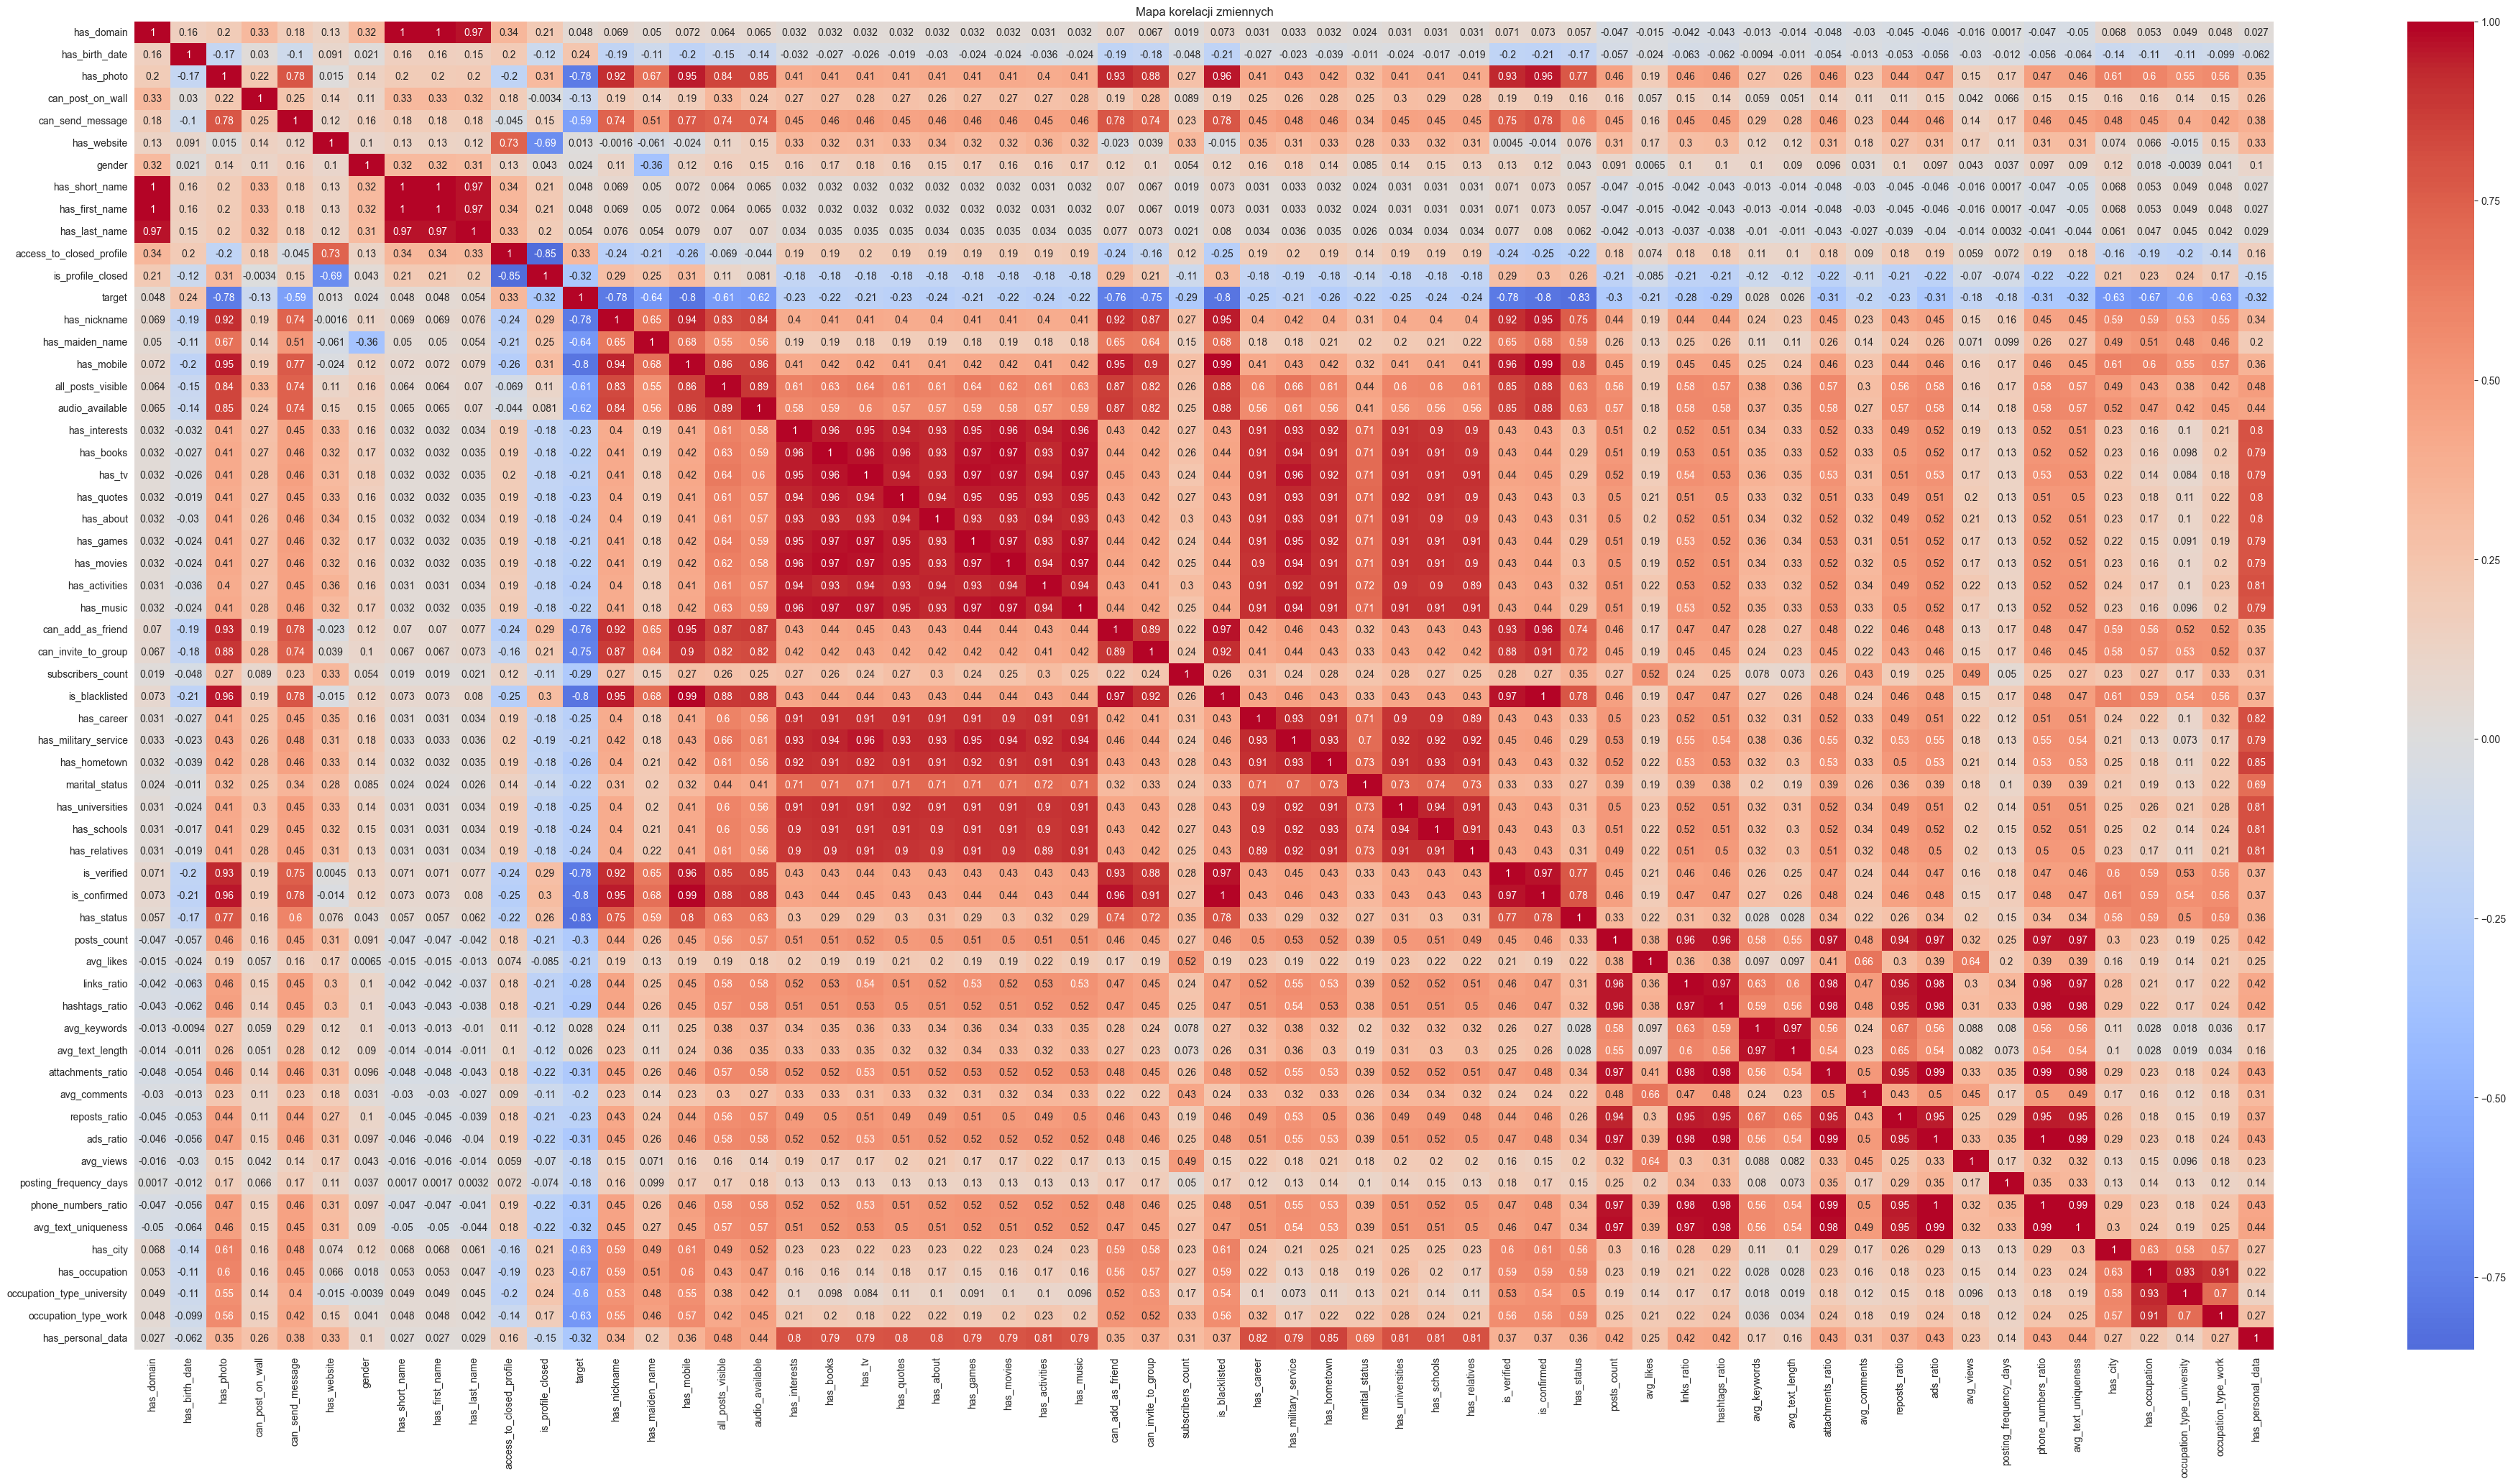

In [258]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
correlation = df[numerical_cols].corr()
plt.figure(figsize=(48, 24))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Mapa korelacji zmiennych')
plt.show()

Związek ze zmienną target

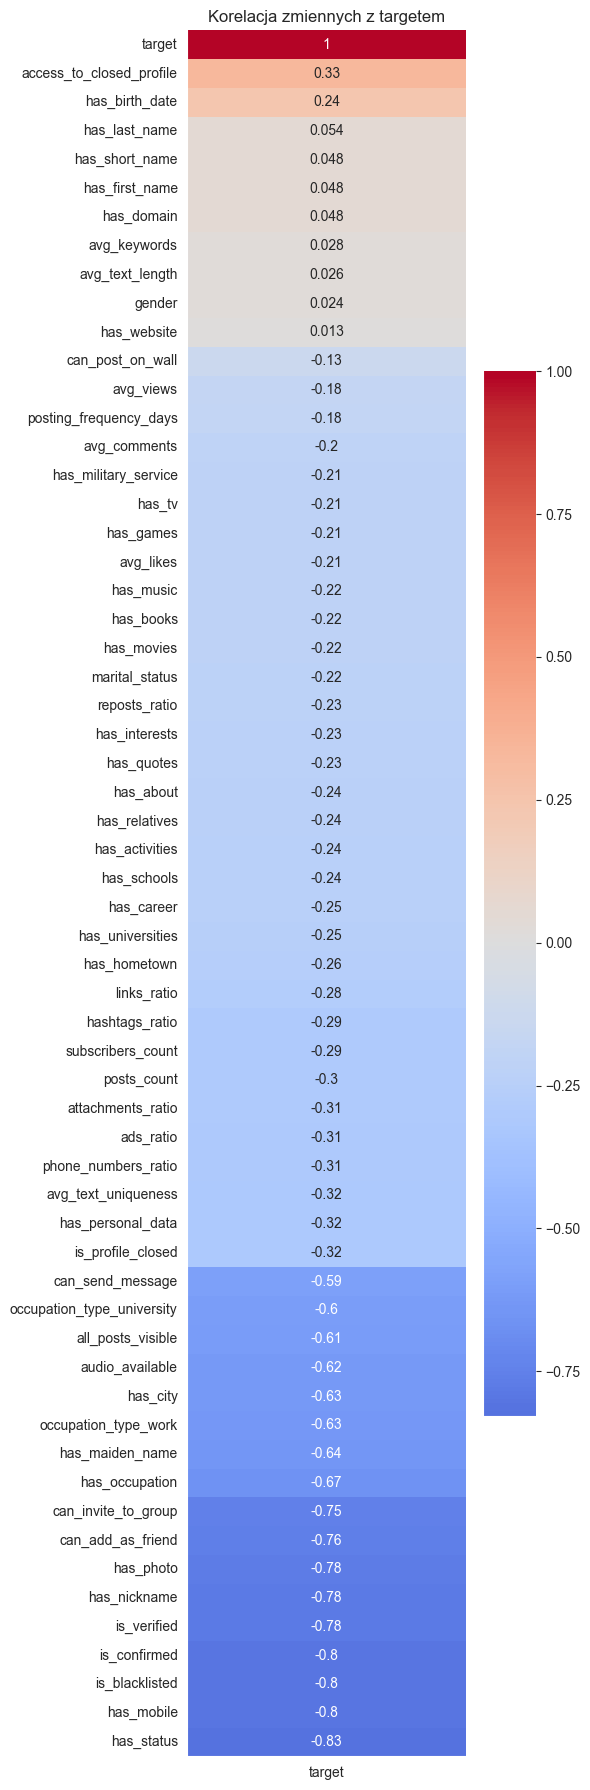

In [259]:
target_corr = correlation[['target']].sort_values(by='target', ascending=False)

plt.figure(figsize=(6, len(target_corr) * 0.3))
sns.heatmap(target_corr, annot=True, cmap='coolwarm', center=0)

sns.despine(left=False, right=True, top=True, bottom=False)
plt.title("Korelacja zmiennych z targetem")
plt.tight_layout()

Przygotowanie danych do modelu

In [260]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=420)

Skalowanie danych

In [261]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Stworzenie modeli

In [262]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

rf_model = RandomForestClassifier(random_state=420)
gb_model = GradientBoostingClassifier(random_state=420)
lr_model = LogisticRegression(random_state=420)

rf_model.fit(X_train_scaled, y_train)
gb_model.fit(X_train_scaled, y_train)
lr_model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=420)

Stworzenie modelu hybrydowego

In [263]:
from sklearn.base import BaseEstimator
import numpy as np

class HybridClassifier(BaseEstimator):
    def __init__(self, models, weights):
        self.models = models
        self.weights = weights
        
    def fit(self, X, y):
        for model in self.models:
            model.fit(X, y)
        return self
    
    def predict_proba(self, X):
        probas = np.zeros((X.shape[0], 2))
        for model, weight in zip(self.models, self.weights):
            probas += weight * model.predict_proba(X)
        probas /= np.sum(self.weights)
        return probas
    
    def predict(self, X):
        probas = self.predict_proba(X)
        return (probas[:, 1] > 0.5).astype(int)
    
hybrid_model = HybridClassifier(
    models=[rf_model, gb_model, lr_model],
    weights=[0.4, 0.4, 0.2]
)

Mierzenie skuteczności modeli

In [264]:
models = {
    'Las Losowy': rf_model.predict(X_test_scaled),
    'Gradient Boosting': gb_model.predict(X_test_scaled),
    'Regresja Logistyczna': lr_model.predict(X_test_scaled),
    'Hybryda': hybrid_model.predict(X_test_scaled)
}

for name, predictions in models.items():
    print(f"\n{name}:")
    print(f"Dokładność: {accuracy_score(y_test, predictions):.4f}")
    print("Raport:")
    print(classification_report(y_test, predictions))


Las Losowy:
Dokładność: 0.9762
Raport:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       581
           1       0.97      0.98      0.98       594

    accuracy                           0.98      1175
   macro avg       0.98      0.98      0.98      1175
weighted avg       0.98      0.98      0.98      1175


Gradient Boosting:
Dokładność: 0.9728
Raport:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       581
           1       0.97      0.98      0.97       594

    accuracy                           0.97      1175
   macro avg       0.97      0.97      0.97      1175
weighted avg       0.97      0.97      0.97      1175


Regresja Logistyczna:
Dokładność: 0.9711
Raport:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       581
           1       0.96      0.98      0.97       594

    accuracy                           0.97  

Wizualizacja dokładności modeli

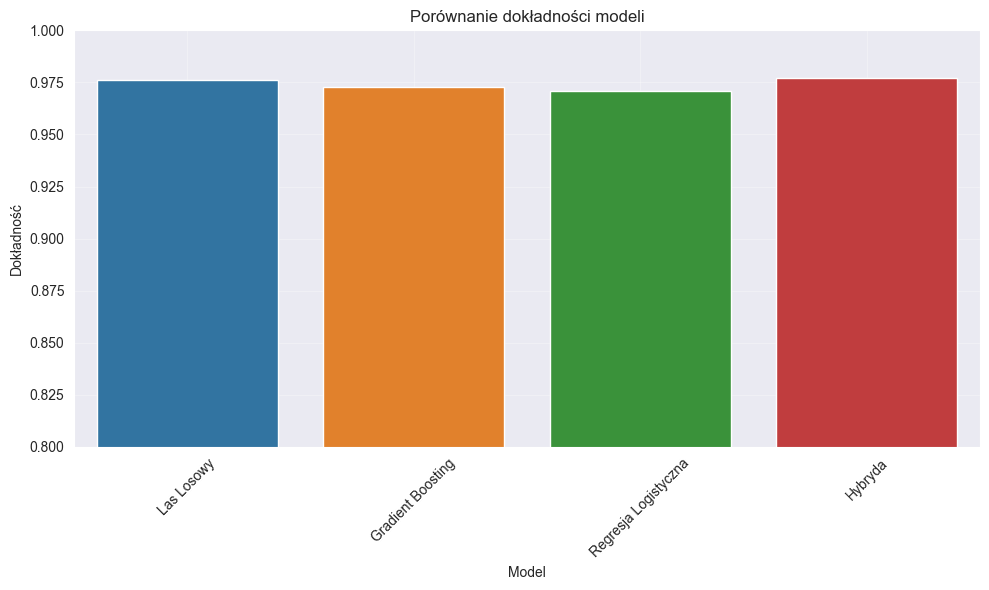

In [265]:
accuracies = {name: accuracy_score(y_test, pred) for name, pred in models.items()}
accuracy_df = pd.DataFrame(list(accuracies.items()), columns=['Model', 'Dokładność'])

plt.figure(figsize=(10, 6))
sns.barplot(data=accuracy_df, x='Model', y='Dokładność', hue='Model', legend=False)
plt.title('Porównanie dokładności modeli')
plt.xticks(rotation=45)
plt.ylim(0.8, 1.0)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Walidacja krzyżowa (bazowych modeli)

In [266]:
from sklearn.model_selection import cross_val_score, KFold

cv = KFold(n_splits=5, shuffle=True, random_state=420)
cv_scores = {}

for name, model in {
    'Las Losowy': rf_model,
    'Gradient Boosting': gb_model,
    'Regresja Logistyczna': lr_model,
    'Hybryda': hybrid_model
}.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring='accuracy')
    cv_scores[name] = scores
    print(f"\n{name} - Walidacja krzyżowa:")
    print(f"Średnia dokładność: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")
    print(f"Wyniki poszczególnych foldów: {scores}")


Las Losowy - Walidacja krzyżowa:
Średnia dokładność: 0.9672 (+/- 0.0137)
Wyniki poszczególnych foldów: [0.96170213 0.95744681 0.96808511 0.97340426 0.97550586]

Gradient Boosting - Walidacja krzyżowa:
Średnia dokładność: 0.9670 (+/- 0.0119)
Wyniki poszczególnych foldów: [0.96382979 0.95957447 0.97553191 0.96382979 0.97231097]

Regresja Logistyczna - Walidacja krzyżowa:
Średnia dokładność: 0.9630 (+/- 0.0136)
Wyniki poszczególnych foldów: [0.9606383  0.95212766 0.9712766  0.96170213 0.96911608]

Hybryda - Walidacja krzyżowa:
Średnia dokładność: 0.9687 (+/- 0.0128)
Wyniki poszczególnych foldów: [0.96489362 0.95851064 0.97340426 0.97021277 0.97657082]


Wizualizacja wyników walidacji krzyżowej

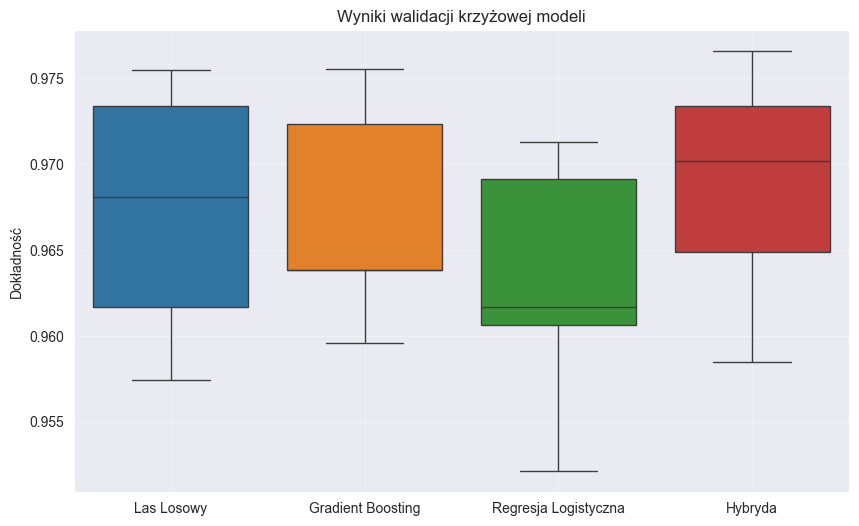

In [267]:
cv_results = pd.DataFrame(cv_scores)
plt.figure(figsize=(10, 6))
sns.boxplot(data=cv_results)
plt.title('Wyniki walidacji krzyżowej modeli')
plt.ylabel('Dokładność')
plt.grid(True, alpha=0.3)
plt.show()